Bayesian Network - pgmpy library package - bnlearn library package 

In [3]:
import pandas as pd 
import numpy as np 


In [4]:
df= pd.read_csv("pen_parametric_LPQ.csv")

In [5]:
df.head()

,pen_id,param_ky,part_ts,reclaim_ct,vchar_param_vl,int_param_vl,dbl_param_vl,param_nm,param_dn,datatag_cd,...,equip_type_ky,equip_type_nm,process_ky,process_nm,last_reclaim_fg,source_db_insert_ts,db_data_source_cd,insert_ts,update_ts,sort_key_dt
0,6671555000708336,44201,2023-07-05 11:32:18.000,1,NaN,NaN,2.541982,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],FoamHeight,F_Ht,...,13718,TIJ2X R1 22 FOAM MONO,2443,FOAM INSERT MONO,Y,2023-07-05 11:32:26.040,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
1,6671555000708336,44306,2023-07-05 11:34:44.000,1,NaN,2322.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax],Power,R_HWPMax,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
2,6671555000708336,44307,2023-07-05 11:34:44.000,1,NaN,76.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl],Amplitude,R_HWAmpl,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
3,6671555000708336,44305,2023-07-05 11:34:44.000,1,NaN,NaN,0.135000,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm],Welding Time,R_HWWeldTm,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
4,6671555000708336,44308,2023-07-05 11:34:44.000,1,NaN,162.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy],Energy,R_HWEnergy,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.257,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13981 entries, 0 to 13980
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pen_id               13981 non-null  int64  
 1   param_ky             13981 non-null  int64  
 2   part_ts              13981 non-null  object 
 3   reclaim_ct           13981 non-null  int64  
 4   vchar_param_vl       306 non-null    object 
 5   int_param_vl         10534 non-null  float64
 6   dbl_param_vl         3135 non-null   float64
 7   param_nm             13981 non-null  object 
 8   param_dn             13981 non-null  object 
 9   datatag_cd           13981 non-null  object 
 10  datatype_cd          13981 non-null  object 
 11  equip_ky             13981 non-null  int64  
 12  equip_nm             13981 non-null  object 
 13  line_nm              13981 non-null  object 
 14  equip_type_ky        13981 non-null  int64  
 15  equip_type_nm        13981 non-null 

In [7]:
df.fillna(0, inplace= True)

In [8]:
df['dbl_param_vl'] = df['int_param_vl'] + df['dbl_param_vl'].apply(lambda x: round(x,3))
df['dbl_param_vl'] = df['dbl_param_vl'].astype(str) + df['vchar_param_vl'].astype(str)

In [9]:
df.head()

,pen_id,param_ky,part_ts,reclaim_ct,vchar_param_vl,int_param_vl,dbl_param_vl,param_nm,param_dn,datatag_cd,...,equip_type_ky,equip_type_nm,process_ky,process_nm,last_reclaim_fg,source_db_insert_ts,db_data_source_cd,insert_ts,update_ts,sort_key_dt
0,6671555000708336,44201,2023-07-05 11:32:18.000,1,0,0.0,2.5420,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],FoamHeight,F_Ht,...,13718,TIJ2X R1 22 FOAM MONO,2443,FOAM INSERT MONO,Y,2023-07-05 11:32:26.040,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
1,6671555000708336,44306,2023-07-05 11:34:44.000,1,0,2322.0,2322.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax],Power,R_HWPMax,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
2,6671555000708336,44307,2023-07-05 11:34:44.000,1,0,76.0,76.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl],Amplitude,R_HWAmpl,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
3,6671555000708336,44305,2023-07-05 11:34:44.000,1,0,0.0,0.1350,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm],Welding Time,R_HWWeldTm,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
4,6671555000708336,44308,2023-07-05 11:34:44.000,1,0,162.0,162.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy],Energy,R_HWEnergy,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.257,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05


In [10]:
unique_lists_1 = df['param_nm'].unique().tolist()

In [11]:
unique_lists_2 = df['process_nm'].unique().tolist()

In [12]:
unique_lists_1

['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWDepth]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkTemp]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkForce]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkTime]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[nozzle_ID]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_Temp]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[FW903Z]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[FW906X]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZInspRes]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZInspFail]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZD1AvgHt]',
 '

In [13]:
unique_lists_2

['FOAM INSERT MONO',
 'Lid',
 'Filter',
 'IHA ADHESIVE CURE',
 'IHA FLEX INSPECT TEST',
 'ADHESIVE DISPENSE',
 'SMART BASE IHA ATTACH',
 'WET PEN ETEST',
 'Ink Fill',
 'Image Quality Test',
 'Tape',
 'INK WEIGHT CPM',
 'Bubble Test']

In [14]:
df.to_csv('pen_parametric_LPQ_processed.csv',index= True)

Data Pre-processing 

In [15]:
transposed_df = df.pivot_table(index='pen_id',columns='param_nm',values='dbl_param_vl', aggfunc='first')

In [16]:
transposed_df

param_nm,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern],...,[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[Tentline2Y],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNoz],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNtw],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobStw],[WET PEN ETEST]-[TIJ2X R1 22 ETEST A]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST B]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST C]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST D]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
pen_id,,,,,,,,,,,,,,,,,,,,,
6671555000708058,2366.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3361.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.0196457136B783E
6671555000708081,2367.00,0.0060,8.00,0.0560,44.90,0.00,15.00,3352.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.01CDB6A4AB31B8D
6671555000708084,2330.00,0.0040,8.00,0.0590,41.90,0.00,15.00,3370.00,0.0050,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.039A4DED16A6E82
6671555000708095,2365.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3355.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.019293A5D9C87C8
6671555000708097,2367.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3367.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.02F79FB422D0C57
6671555000708116,2358.00,0.0060,8.00,0.0560,44.90,0.00,15.00,3368.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.037CFD342C1FCEF
6671555000708132,2363.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3367.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.0093ABACE1DBC3F
6671555000708149,2323.00,0.0040,8.00,0.0590,42.00,0.00,15.00,3367.00,0.0050,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.03767693405C5E1
6671555000708157,2049.00,0.0060,8.00,0.10,52.00,30.00,15.00,3073.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.031D5F55864FAEC


In [17]:
transposed_df.to_csv('transposed_LPQ.csv')

In [18]:
df_transposed = pd.read_csv('transposed_LPQ.csv')

In [19]:
df_transposed

,pen_id,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],...,[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[Tentline2Y],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNoz],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNtw],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobStw],[WET PEN ETEST]-[TIJ2X R1 22 ETEST A]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST B]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST C]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST D]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
0,6671555000708058,2366.0,0.006,8.0,0.056,45.0,0.0,15.0,3361.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0196457136B783E
1,6671555000708081,2367.0,0.006,8.0,0.056,44.9,0.0,15.0,3352.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.01CDB6A4AB31B8D
2,6671555000708084,2330.0,0.004,8.0,0.059,41.9,0.0,15.0,3370.0,0.005,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.039A4DED16A6E82
3,6671555000708095,2365.0,0.006,8.0,0.056,45.0,0.0,15.0,3355.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.019293A5D9C87C8
4,6671555000708097,2367.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.02F79FB422D0C57
5,6671555000708116,2358.0,0.006,8.0,0.056,44.9,0.0,15.0,3368.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.037CFD342C1FCEF
6,6671555000708132,2363.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0093ABACE1DBC3F
7,6671555000708149,2323.0,0.004,8.0,0.059,42.0,0.0,15.0,3367.0,0.005,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03767693405C5E1
8,6671555000708157,2049.0,0.006,8.0,0.100,52.0,30.0,15.0,3073.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.031D5F55864FAEC
9,6671555000708162,2369.0,0.006,8.0,0.056,44.9,0.0,15.0,3366.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03C2A1DD51048FD


In [20]:
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 347 entries, pen_id to [WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
dtypes: float64(335), int64(1), object(11)
memory usage: 114.0+ KB


In [21]:
df_CPM = pd.read_csv('LPQ_CPM.csv')

In [22]:
df_CPM

,pen_id,Status
0,6671555000708241,Deprime
1,6671555000708191,Pass
2,6671555000708058,Pass
3,6671555000708116,Pass
4,6671555000708095,Pass
5,6671555000708202,Pass
6,6671555000708324,Pass
7,6671555000708306,Pass
8,6671555000708260,Pass
9,6671555000708305,Pass


In [37]:
df_merged = pd.merge(df_transposed, df_CPM, on='pen_id', how ='inner')

In [38]:
df_merged

,pen_id,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Fail],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MinWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MinWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FSFail],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[InspFail],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[InspResult],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3Vol],[ADHESI

In [39]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df_merged.isnull().sum())

pen_id                                                                    0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime]               0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern]              0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure]                0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly]                0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime]               0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern]              0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure]                0
[ADHESIVE DI

In [40]:
display(df_merged.nunique())

pen_id                                                                   42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime]              33
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern]              1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure]                6
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly]                3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time]                 1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime]              37
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern]              1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]                 4
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure]                7
[ADHESIVE DI

- remove rows with missing value 
- remove nunique <=3, doesn't provide any valuable insight  

Critical parameter Z1 - missing data filter staking 
[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht] 


Critical parameter Z2
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt] 
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt] 
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi] 
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]          
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]         
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]         
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_U]           
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_X]           
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_Y]           
[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank] 

Critical parameter Z3
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta] 
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose] 
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]

In [42]:
columns_to_include = [
    "[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_U]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_X]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_Y]",
    "[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]",
    "[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]",
    "[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]",
    "[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]",
    "Status"
]

df_selected = df_merged[columns_to_include]

In [43]:
df_selected = df_selected.dropna(axis=1)

In [44]:
unique_counts = df_selected.drop('Status',axis=1).nunique()

columns_to_drop = unique_counts[unique_counts <=3].index.tolist()
if 'Status' in columns_to_drop:
    columns_to_drop.remove('Status')

df_merged_filtered = df_selected.drop(columns=columns_to_drop)

In [45]:
df_merged_filtered

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_U],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_X],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_Y],[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status
0,2.527,778.0,1294.0,470.0,764.0,78.0,-900.0,-1060.0,0.015,0.014,-0.012,6.0,3.899,28.920,61.62,25.102,29.082,2.462,1.886,25.021,28.920,3.980,Pass
1,2.762,758.0,1235.0,452.0,745.0,63.0,-1224.0,-303.0,0.110,0.049,-0.001,3.0,4.227,29.106,61.80,24.960,29.037,2.574,1.899,24.879,29.106,4.077,Pass
2,1.883,839.0,1352.0,514.0,804.0,-22.0,-453.0,-931.0,0.026,0.006,-0.012,2.0,4.120,29.129,61.76,25.021,29.071,2.487,1.896,25.009,29.129,4.050,Pass
3,2.435,817.0,1392.0,497.0,823.0,110.0,-731.0,-919.0,0.096,0.041,-0.005,2.0,3.981,28.920,61.78,25.043,29.046,2.512,1.867,24.939,28.920,4.003,Pass
4,2.334,776.0,1333.0,484.0,784.0,143.0,-665.0,-1326.0,0.002,0.023,-0.016,2.0,4.235,29.082,61.65,24.963,29.163,2.537,1.880,24.847,29.082,4.200,Pass
5,2.577,785.0,1274.0,461.0,764.0,97.0,-819.0,-597.0,0.010,0.012,-0.023,1.0,4.107,29.023,61.76,24.962,29.012,2.477,1.855,24.916,29.023,4.050,Pass
6,3.058,795.0,1274.0,463.0,725.0,151.0,-704.0,-558.0,0.006,0.047,-0.031,6.0,4.067,28.934,61.54,24.937,29.014,2.515,1.871,24.867,28.934,4.077,Pass
7,2.510,804.0,1561.0,508.0,784.0,150.0,-770.0,-406.0,0.114,0.040,-0.012,2.0,4.020,28.945,61.85,24.971,29.003,2.477,1.855,24.925,28.945,4.032,Pass
8,2.674,785.0,1431.0,491.0,745.0,35.0,-1629.0,-1483.0,0.022,-0.013,-0.005,1.0,4.044,28.934,61.83,25.006,29.003,2.531,1.883,24.890,28.934,3.997,Pass
9,2.724,803.0,1254.0,476.0,764.0,120.0,-783.0,-532.0,0.003,0.037,-0.024,4.0,4.078,28.957,61.91,24.960,29.003,2.515,1.849,24.879,28.957,4.043,Pass


In [46]:
df_merged_filtered.nunique()

[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]                   42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]            34
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]            15
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]            34
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]             6
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]     34
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]    38
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]    39
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_U]      35
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_X]      28
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_Y]      25
[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]       6
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]                         36
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]                          31
[INK W

In [48]:
keywords_to_remove = ['TAPE', 'SMART', 'ETEST','FLEX','pen_ID','VENT','Image']

# Get columns containing any of the keywords
columns_to_drop = df_merged_filtered.columns[df_merged_filtered.columns.str.contains('|'.join(keywords_to_remove), case=False)]

# Drop the selected columns from the DataFrame
df_featured = df_merged_filtered.drop(columns=columns_to_drop)

df_featured_reset = df_featured.reset_index(drop=True)
# Display the updated DataFrame
print(df_featured_reset)


    [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]  \
0                                               2.527   
1                                               2.762   
2                                               1.883   
3                                               2.435   
4                                               2.334   
5                                               2.577   
6                                               3.058   
7                                               2.510   
8                                               2.674   
9                                               2.724   
10                                              1.808   
11                                              2.349   
12                                              2.569   
13                                              2.381   
14                                              2.289   
15                                              2.389   
16                             

- Feature importance - foam, filter, adhesive, ink fill, ink weight 

- foam height 
- filter - unknown - filter bubble test + input parameter 
- adhesive dispense - 
- adhesive inspect - FB1MinHt, FB1MinWi
- post cure xy inspect - pc_insp_u, pc_insp_x, insp_y
- inkfill - vacuum delta
- ink weight - CPM 

In [49]:
df_featured_reset.to_csv('feature_selected.csv')

Bayesian Networks 

In [50]:
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator, BicScore
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

from feature_engine import discretisation as dsc

import networkx as nx
import pylab as plt
import time

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
target = 'Status'

In [60]:
col_list = []
for col in df_featured_reset.columns:
    print(col, ": ", len(df_featured_reset[col].unique()))
    if(len(df_featured_reset[col].unique()) > 5):
        col_list.append(col)

[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht] :  42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt] :  34
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi] :  15
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt] :  34
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi] :  6
[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank] :  6
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta] :  36
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose] :  31
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt] :  29
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac] :  33
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac] :  28
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas] :  31
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas] :  28
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac] :  32
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac] :  31
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] :  39
Status :  2


In [61]:
num_bins = 3
disc = dsc.EqualFrequencyDiscretiser(q=num_bins, variables=col_list)
df_binned = disc.fit(df_featured_reset[col_list])
equalfrequency_discretizer_dict = disc.binner_dict_
bin_df_equalfrequency = pd.DataFrame.from_dict(equalfrequency_discretizer_dict, orient = 'index')  

In [62]:
bin_df_equalfrequency

,0,1,2,3
[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],-inf,2.368333,2.570667,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt],-inf,784.333333,805.000000,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi],-inf,1313.000000,1378.333333,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt],-inf,488.666667,505.333333,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi],-inf,764.000000,784.000000,inf
[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank],-inf,3.000000,4.000000,inf
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta],-inf,4.041333,4.114667,inf
[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose],-inf,28.933333,29.000000,inf
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],-inf,61.756667,61.833333,inf
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac],-inf,24.951667,25.009333,inf


In [68]:
df_featured_reset.describe()

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi],[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]
count,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2.43100,800.380952,1346.761905,494.142857,777.047619,3.380952,4.076714,28.974071,60.319286,24.976762,29.040952,2.437595,1.926095,24.897357,28.974071,4.064190
std,0.27852,40.240104,65.787837,21.420951,24.919336,1.576541,0.097057,0.063031,9.535049,0.064863,0.051005,0.125852,0.066142,0.070192,0.063031,0.085377
min,1.79600,701.000000,1235.000000,452.000000,725.000000,1.000000,3.835000,28.857000,0.000000,24.859000,28.960000,2.074000,1.842000,24.766000,28.857000,3.892000
25%,2.33725,779.000000,1294.000000,472.250000,764.000000,2.000000,4.020000,28.922750,61.717500,24.930250,29.003000,2.373250,1.855000,24.849250,28.922750,4.003250
50%,2.47800,795.000000,1362.000000,499.500000,784.000000,3.500000,4.087000,28.963500,61.795000,24.973000,29.031500,2.472500,1.927000,24.893000,28.963500,4.052000
75%,2.59650,813.750000,1392.000000,508.000000,799.000000,4.750000,4.135000,29.004750,61.850000,25.015250,29.071000,2.528500,1.985250,24.938500,29.004750,4.123750
max,3.05800,895.000000,1561.000000,527.000000,823.000000,6.000000,4.305000,29.129000,62.040000,25.114000,29.187000,2.574000,2.024000,25.079000,29.129000,4.285000


Discretization 

In [69]:
min(df_featured_reset['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]'].unique()), max(df_featured_reset['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]'].unique())

(1.796, 3.058)

- in excel 


In [ ]:
bin_MONO-[F_Ht]=['1.796 to 2.368333','2.368333 to 2.570667','2.570667 to 3.058']
                 

In [ ]:
df_featured_reset['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]'] = pd.cut(df_featured_reset['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]'], 3, labels= bin_MONO-[F_Ht])

In [63]:
df_train = df_featured_reset[:30]

In [42]:
df_train

,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV1Area],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV1Diam],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV1MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV2Area],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV2Diam],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV2MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV3Area],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV3CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV3CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV3Diam],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV3MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[UV3Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 UV DISPENSE]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 UV DISPENSE]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 UV DISPENSE]-[Pressure],[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank],[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[nozzle_ID],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac],[In

In [57]:
from pgmpy.estimators import HillClimbSearch, BicScore
import matplotlib.pyplot as plt
import networkx as nx

hc = HillClimbSearch(df_train)
best_model = hc.estimate(scoring_method=BicScore(df_train))  # Specify the scoring method here

# Add the target variable to the model
target_variable = "Status"  # Replace with the actual name of your target variable
edges = list(best_model.edges())
edges.append(('[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]',target_variable))

model = BayesianModel(edges)

  0%|          | 0/1000000 [00:00<?, ?it/s]

Network definition

In [ ]:
model_1 = BayesianModel([()])

In [64]:
edges_1 = [
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_U]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_X]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_Y]", "Status"),
    ("[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]", "Status"),
    ("[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]", "Status"),
    ("[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]", "Status"),
    ("[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]", "Status"),
    ("[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]", "Status")
]


In [65]:
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges_1)

<Figure size 1000x800 with 0 Axes>

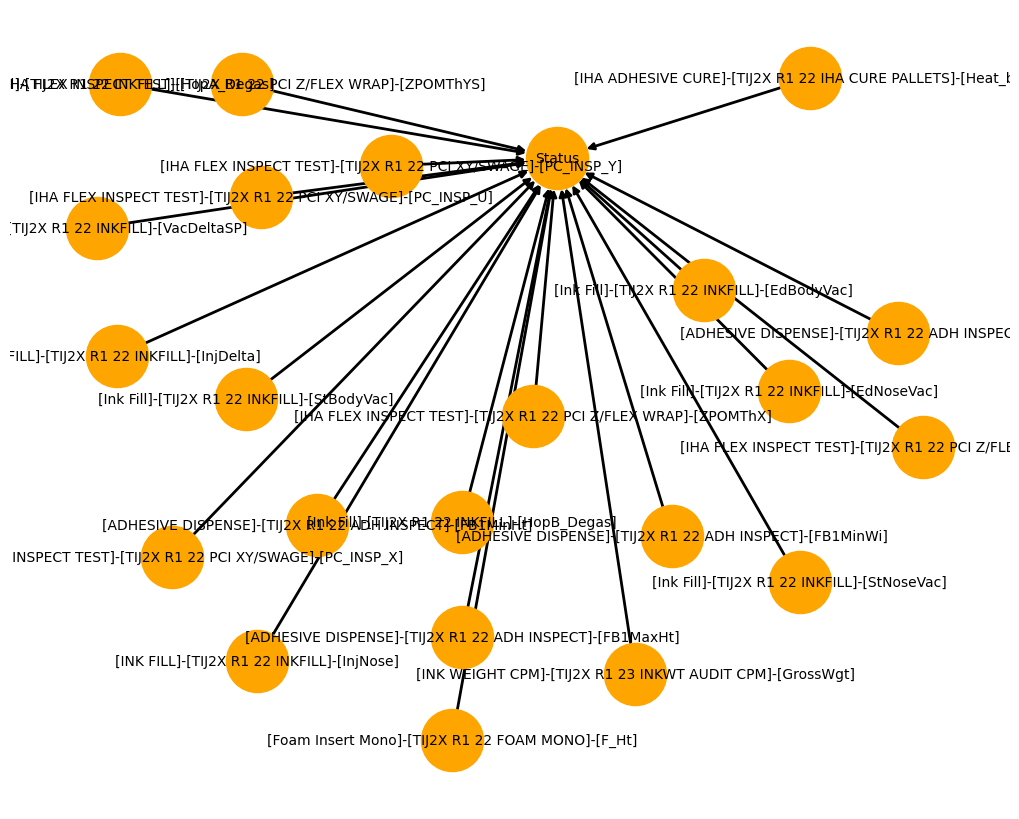

In [66]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos=pos, with_labels=True, node_size=2000, node_color="orange", width=2, font_size=10)
plt.show()

In [67]:
print("Nodes in the graph:", model.nodes())
print("Edges in the graph:", model.edges())

NameError: name 'model' is not defined

In [62]:
# Fitting the data to the model using Maximum Likelihood Estimator
model.fit(df_train, estimator=MaximumLikelihoodEstimator)

# Doing exact inference using Variable Elimination
infer = VariableElimination(model)

In [65]:
model.get_children(target_variable)

[]

In [67]:
model.get_parents(target_variable)

['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]']

In [43]:
#describe the data
df.describe()

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [1]:
#print the 1st 5 rows 
df.head(5)

NameError: name 'df' is not defined

In [44]:
#retrieve the preliminary info of the dataset 
df.info

<bound method DataFrame.info of      Native Speaker  Course instructor  Course  Semesterr  Class Size  Class
0                 1                 23       3          1          19      3
1                 2                 15       3          1          17      3
2                 1                 23       3          2          49      3
3                 1                  5       2          2          33      3
4                 2                  7      11          2          55      3
..              ...                ...     ...        ...         ...    ...
146               2                  3       2          2          26      1
147               2                 10       3          2          12      1
148               1                 18       7          2          48      1
149               2                 22       1          2          51      1
150               2                  2      10          2          27      1

[151 rows x 6 columns]>

In [45]:
#print the 1st 5 rows 
df.head(5)

,Native Speaker,Course instructor,Course,Semesterr,Class Size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [46]:
#count observations based on attribute 
df['Class'].value_counts()

3    52
2    50
1    49
Name: Class, dtype: int64

In [47]:
#select rows from dataframe, exclude the last attribute 
X=df.iloc[:,:-1]
# sum of null data based on attributes 
X.isnull().sum()

Native Speaker       0
Course instructor    0
Course               0
Semesterr            0
Class Size           0
dtype: int64

#Data Preparation 

In [111]:
#Training dataset 
#select all columns except the last one 
X= df.drop("Class", axis=1)
#set target categorical data label (6th attribute)
y= df["Class"]

#train-test split - 70/30 ratio
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42) #data imbalance, add a new argument stratify = y 

In [112]:
print('-------- x axis test ----------')
print(X_test)
print('-------- x axis train ---------')
print(X_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
     Native Speaker  Course instructor  Course  Semesterr  Class Size
76                2                  5       2          2          48
18                2                 13       3          1          10
82                2                 13       3          1          11
81                2                  9       2          2          39
143               2                  3       2          2          37
31                2                 18       5          2          19
78                1                 23       3          1          25
64                2                  7      11          2          13
55                2                  7      11          2          10
85                2                  7      11          1          20
45                2                  9       5          2          19
12                2                 18      21          2          29
36                2                  4      16          2 

#Modelling 

#Evaluation

In [113]:
#import KNN model as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

#define k-value
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

#Estimate the accuracy of the classifier on test data
y_pred= knn.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
score

0.5652173913043478

The result showed that the highest accuracy obtained by KNN when k=1 (accuracy=0.565)

Hyperparameter tuning, k 

The optimal number of neighbors is 16
The optimal score is 0.63


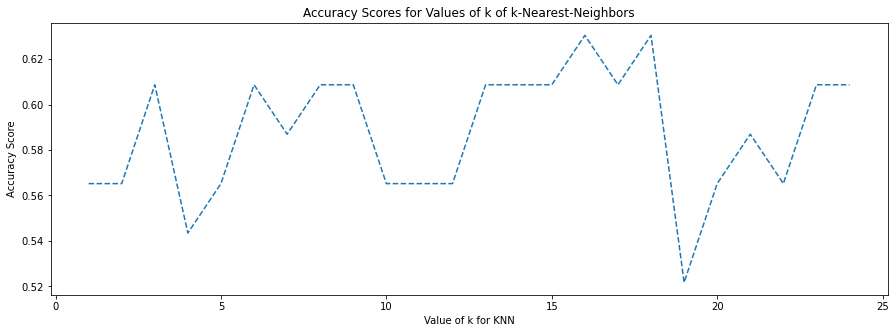

In [114]:
import matplotlib.pyplot as plt # library for plotting
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')
# line required for inline charts/plots
%matplotlib inline
# empty variable for storing the KNN metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,25))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
 # input the train data to train KNN
 knn.fit(X_train,y_train)
 # see KNN prediction by inputting the test data
 y_pred=knn.predict(X_test)
 # append the performance metric (accuracy)
 scores.append(metrics.accuracy_score(y_test,y_pred))
 optimal_k = lrange[scores.index(max(scores))]

print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
plt.figure(2,figsize=(15,5))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The prediction accuracy is: 60.87%


Text(0.5, 51.0, 'Predicted label')

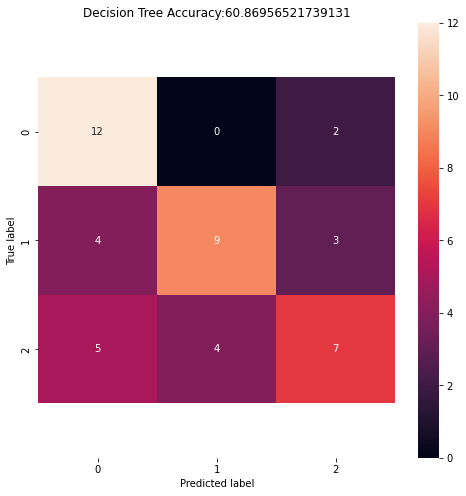

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
# predict the classes of new, unseen data
predict = knn.predict(X_test)
print("The prediction accuracy is: {0:2.2f}{1:s}".format(knn.score(X_test,y_test)*100,"%"))
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)
# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(knn.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

The optimal number of neighbors is 13
The optimal score is 0.58
[0.54545455 0.72727273 0.36363636 0.54545455 0.63636364 0.7
 0.4        0.4        0.6        0.6       ]


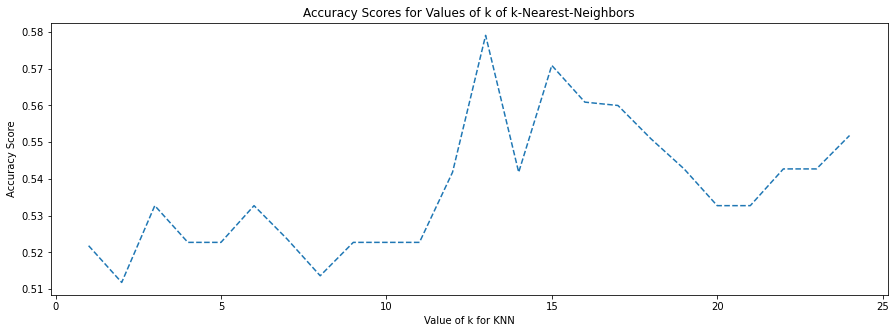

In [116]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score
# empty variable for storing the KNN metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,25))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
 # get score for the 10 fold cross validation
 score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
 scores.append(score.mean())
optimal_k = lrange[scores.index(max(scores))]

print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
plt.figure(2,figsize=(15,5))
print(score)
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Q1: refer to the data understanding 

After checking the null_value, there's no empty or null in any of the attributes. If there's any, there're few approaches.

Approach 1: deleting rows 
1. df.dropna()
Pro: complete removal of data with missing values results in robust and highly accurate model 
Con: works poorly if the percentage of missing values is high, says 30%

Approach 2: replacing null values with mean,median,mode 
1. df['x']. finllna(df['x'].median(),inplace= True) 
2. df['x'].fillna(df.groupby(['a','b'])['x'].transform('mean'))
Pro: prevent data loss which results in removals of the rows and columns 
Con: Imputing the approximations add variance and bias, works poorly compared to other multi-imputations method  

Q2:
1. Tuning the hyperparameter of K number in the range of 25, the accuracy varies across the value of K. Yes, higher values of K leads to better performance if compared to the default K number = 1. Higher values of K is only up to certain extent of accuracy, beyond that, it does'nt helps much in the accuracy of the test data in overall.

2. Yes, cross-validation affects the KNN performance. The purpose of cross-validation is to increase the generalization of the model, says testing on the unseen data by shuffling the dataset randomly. The optimal neighbours number = 13 after performing cross-validation as compared to optimal K number = 16. 